In [1]:
import pandas as pd
logs = pd.read_csv("login_logs.csv")
logs.head()

,timestamp,username,status,ip_address
0,2025-08-29 09:15:10,john,success,192.168.1.10
1,2025-08-29 09:17:22,alice,failure,192.168.1.11
2,2025-08-29 09:20:05,john,failure,192.168.1.10
3,2025-08-29 09:25:45,bob,success,192.168.1.12
4,2025-08-29 09:30:15,alice,success,192.168.1.11


In [2]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   timestamp   7 non-null      object
 1   username    7 non-null      object
 2   status      7 non-null      object
 3   ip_address  7 non-null      object
dtypes: object(4)
memory usage: 356.0+ bytes


In [3]:
logs.isnull().sum()

timestamp     0
username      0
status        0
ip_address    0
dtype: int64

In [4]:
login_count = logs['username'].value_counts()

In [5]:
print(login_count)

username
john     3
alice    2
bob      2
Name: count, dtype: int64


In [6]:
status_count = logs["status"].value_counts()
print(status_count)

status
success    4
failure    3
Name: count, dtype: int64


In [11]:
status_count = logs.groupby(['username','status']).size().unstack(fill_value=0)
print(status_count)

status    failure  success
username                  
alice           1        1
bob             1        1
john            1        2


In [13]:
failed_login = logs[logs['status'] == 'failure']['username'].value_counts()
print(failed_login)

username
alice    1
john     1
bob      1
Name: count, dtype: int64


In [16]:
logs['timestamp'] = pd.to_datetime(logs['timestamp'])

In [22]:
logs['timestamp'] = pd.to_datetime(logs['timestamp'])
for idx, row in logs.iterrows():
    print(f"{row['timestamp']} - user: {row['username']}")

2025-08-29 09:15:10 - user: john
2025-08-29 09:17:22 - user: alice
2025-08-29 09:20:05 - user: john
2025-08-29 09:25:45 - user: bob
2025-08-29 09:30:15 - user: alice
2025-08-29 09:35:33 - user: john
2025-08-29 09:40:50 - user: bob


In [24]:
logs['hour'] = logs['timestamp'].dt.hour
logins_per_hour = logs.groupby('hour').size()
print(logins_per_hour)

hour
9    7
dtype: int64


In [25]:
failed_per_hour = logs[logs['status'] == 'failure'].groupby('hour').size()
print(failed_per_hour)

hour
9    3
dtype: int64


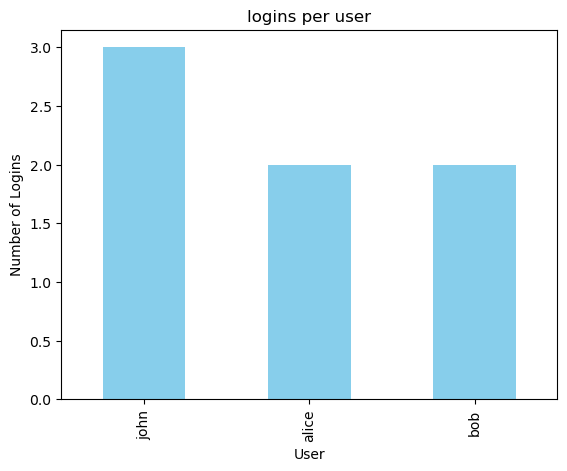

In [28]:
import matplotlib.pyplot as plt
login_count.plot(kind ='bar', title='logins per user', color='skyblue')
plt.xlabel('User')
plt.ylabel('Number of Logins')
plt.show()

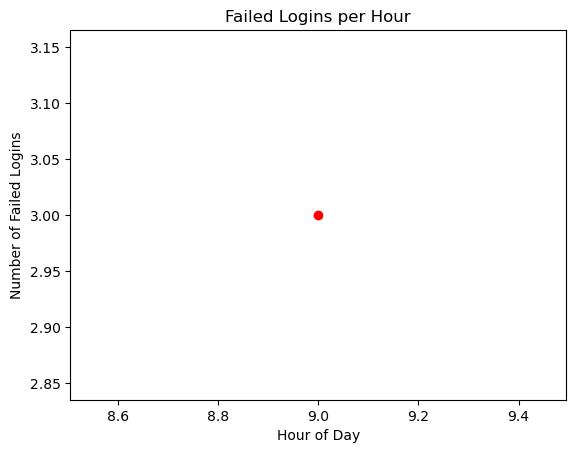

In [31]:
failed_per_hour.plot(kind='line', title='Failed Logins per Hour', marker='o', color='red')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Failed Logins')
plt.show()

In [ ]:
import numpy as np
user1 = np.array([1,0,0,1,0,0,0])
user2 = np.array([1,1,1,1,1])
user3 = np.array([0,0,0,0,0])
def check_suspicious(login, threshold=0.6):
    failures = np.sum(login == 0)
    total = login.size
    fail_rate = failures / total
    return fail_rate > threshold

print("user1 suspicious?", check_suspicious(user1))
print("user2 suspicious?", check_suspicious(user2))
print("user3 suspicious?", check_suspicious(user3))